<a href="https://colab.research.google.com/github/anuragshrikhandkar/Resume-Screening-NLP-Project/blob/main/resume_screening_app_NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv("/content/final_merged_dataset2.csv (1).zip")

In [62]:
df.sample(6)
#data cleaning

,Resume,Category
223,Python Developer Python Developer Sr. Python D...,Python_Developer
2875,React Developer React Developer React Develope...,Front_End_Developer
4742,Security Analyst Security Analyst Security Ana...,Security_Analyst
6213,Systems Administrator Systems Administrator Sy...,Systems_Administrator
5031,Information Security Analyst Information Secur...,Security_Analyst
3639,LEAD BUSINESS ANALYST-SCRUM MASTER LEAD BUSINE...,Project_manager


In [63]:
df.shape

(8234, 2)

In [64]:
df['Category'].value_counts()

,count
Category,
Python_Developer,1278
Java_Developer,1242
Web_Developer,984
Database_Administrator,920
Security_Analyst,876
Systems_Administrator,776
Project_manager,722
Front_End_Developer,530
Network_Administrator,469


In [65]:
df['Category']

,Category
0,Python_Developer
1,Python_Developer
2,Python_Developer
3,Python_Developer
4,Python_Developer
...,...
8229,Database_Administrator
8230,Database_Administrator
8231,Database_Administrator
8232,Database_Administrator


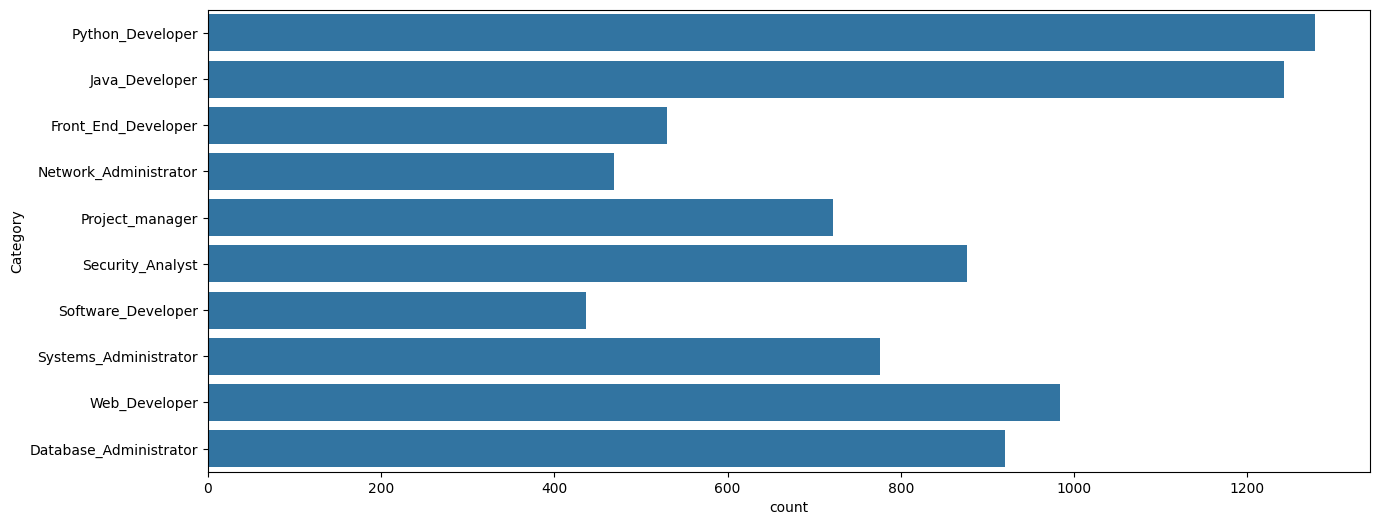

In [66]:
plt.figure(figsize=(15,6))
sns.countplot(df['Category'])
plt.show()

In [67]:
df['Category'].unique()

array(['Python_Developer', 'Java_Developer', 'Front_End_Developer',
       'Network_Administrator', 'Project_manager', 'Security_Analyst',
       'Software_Developer', 'Systems_Administrator', 'Web_Developer',
       'Database_Administrator'], dtype=object)

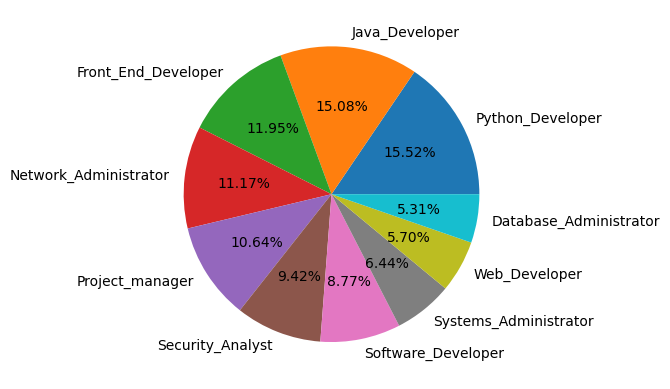

In [68]:
plt.pie(df['Category'].value_counts(),labels=df['Category'].unique(),autopct='%.2f%%')
plt.show()

In [69]:
#explore reume datasets and clean hashtags urls etc
df['Resume'][10]

'Infrastructure Engineer Infrastructure Engineer Python Developer - Transparent Language Manchester, NH Professional Learner. Currently working as a python developer with 5 years of experience. Involved in development of microservices, creation/maintenance of automated CI pipelines, and logging and monitoring tools. Authorized to work in the US for any employer Work Experience Infrastructure Engineer Liberty Mutual - Dover, NH April 2019 to Present Maintain and support IBM BPM / Websphere Applications. Containerize legacy applications. Support/implement automation using python and other scripting languages. Python Developer Transparent Language - Nashua, NH February 2014 to April 2019  Worked with a team to develop and maintain 90+ microservice applications.  Implement and maintain monitoring and logging tools to support a growing microservice infrastructure  Create and maintain continuous integration & deployment pipelines. QA Tester Transparent Language - Nashua, NH August 2012 to Fe

Data Cleaning
URLS
HASHTAGS
SPECIAL LETTER
PUNCUATION


In [70]:
import re
def cleanResume(txt):
  cleanText=re.sub('http\S+\s',' ',txt)
  cleanText=re.sub('@\S+',' ',cleanText)
  cleanText=re.sub('#\S+',' ',cleanText)
  cleanText=re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanText)
  cleanText=re.sub(r'[^\x00-\x7f]',' ',cleanText)
  cleanText=re.sub('\s+',' ',cleanText)
  cleanText=re.sub('\n',' ',cleanText)
  cleanText=re.sub('RT|cc',' ',cleanText)

  return cleanText


In [71]:
cleanResume("#### $ @@@||| bhabius;d")

' bhabius d'

In [72]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

In [73]:
df['Resume'][10]

'Infrastructure Engineer Infrastructure Engineer Python Developer Transparent Language Manchester NH Professional Learner Currently working as a python developer with 5 years of experience Involved in development of microservices creation maintenance of automated CI pipelines and logging and monitoring tools Authorized to work in the US for any employer Work Experience Infrastructure Engineer Liberty Mutual Dover NH April 2019 to Present Maintain and support IBM BPM Websphere Applications Containerize legacy applications Support implement automation using python and other scripting languages Python Developer Transparent Language Nashua NH February 2014 to April 2019 Worked with a team to develop and maintain 90 microservice applications Implement and maintain monitoring and logging tools to support a growing microservice infrastructure Create and maintain continuous integration deployment pipelines QA Tester Transparent Language Nashua NH August 2012 to February 2014 Manual testing of 

In [74]:
df['Category']

,Category
0,Python_Developer
1,Python_Developer
2,Python_Developer
3,Python_Developer
4,Python_Developer
...,...
8229,Database_Administrator
8230,Database_Administrator
8231,Database_Administrator
8232,Database_Administrator


In [75]:
df

,Resume,Category
0,Python Developer Python Developer Philadelphia...,Python_Developer
1,Python Developer Python Developer Python Devel...,Python_Developer
2,R D Engineer R D Engineer R D Engineer Nokia S...,Python_Developer
3,Sr Full Stack Developer Sr Full Stack Develope...,Python_Developer
4,Sr Full Stack Python Developer Sr Full Stack P...,Python_Developer
...,...,...
8229,Oracle database administrator Oracle database ...,Database_Administrator
8230,Job Seeker Columbus OH I am responsible and de...,Database_Administrator
8231,Database Administrator Database Administrator ...,Database_Administrator
8232,Business Intelligence Engineer Business Intell...,Database_Administrator


In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [77]:
df.Category.unique()

array([5, 2, 1, 3, 4, 6, 7, 8, 9, 0])

In [78]:

#array(['Python_Developer', 'Java_Developer', 'Front_End_Developer',
 #      'Network_Administrator', 'Project_manager', 'Security_Analyst',
  #     'Software_Developer', 'Systems_Administrator', 'Web_Developer',
   #    'Database_Administrator'], dtype=object)


In [79]:
df['Resume'][10]

'Infrastructure Engineer Infrastructure Engineer Python Developer Transparent Language Manchester NH Professional Learner Currently working as a python developer with 5 years of experience Involved in development of microservices creation maintenance of automated CI pipelines and logging and monitoring tools Authorized to work in the US for any employer Work Experience Infrastructure Engineer Liberty Mutual Dover NH April 2019 to Present Maintain and support IBM BPM Websphere Applications Containerize legacy applications Support implement automation using python and other scripting languages Python Developer Transparent Language Nashua NH February 2014 to April 2019 Worked with a team to develop and maintain 90 microservice applications Implement and maintain monitoring and logging tools to support a growing microservice infrastructure Create and maintain continuous integration deployment pipelines QA Tester Transparent Language Nashua NH August 2012 to February 2014 Manual testing of 

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english',)

tfidf.fit(df['Resume'])
required=tfidf.transform(df['Resume'])


In [104]:
required

<8234x69562 sparse matrix of type '<class 'numpy.float64'>'
	with 3105985 stored elements in Compressed Sparse Row format>

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(required,df['Category'],train_size=0.2,random_state=2)

In [83]:
#Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.multiclass import OneVsRestClassifier
knn=OneVsRestClassifier(KNeighborsClassifier())

In [84]:

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
print("accurcay_score is ",accuracy_score(y_test,y_pred))
print(y_pred)

accurcay_score is  0.8040376442015786
[9 5 5 ... 9 2 6]


In [85]:
#RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(("accuracy_score",accuracy_score(y_test,y_pred)))

('accuracy_score', 0.8268063145112325)


In [86]:
print(y_pred)

[9 5 5 ... 6 2 3]


In [87]:
y_pred


array([9, 5, 5, ..., 6, 2, 3])

In [88]:
#extra trees classifierfrom skle
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
print("accurcay_score",accuracy_score(y_test,y_pred))


accurcay_score 0.8107164541590771


In [89]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print("accurcay_score",accuracy_score(y_test,y_pred))

accurcay_score 0.6953551912568307


In [90]:
#predict system
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))

In [102]:
myresume="""

"""


In [103]:
import pickle
rfc=pickle.load(open('model.pkl','rb'))

cleaned_resume=cleanResume(myresume)
input_features=tfidf.transform([cleaned_resume])
prediction=rfc.predict(input_features)
print(prediction)

[4]
